## Credit Risk Modelling

### Libraries

In [1]:
import pandas as pd 
import numpy as np 
import sklearn as sk 
import seaborn as sns
import matplotlib.pyplot as plt 

### Data

In [2]:
df =  pd.read_csv('raw-data.csv')

/tmp/ipykernel_27733/1963344327.py:1: DtypeWarning: Columns (9,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('raw-data.csv')


### Data Info

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


#### Rename columns

In [4]:
#Renaming columns in the dataset with their correct names
df = df.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
df.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


In [5]:
df.columns

Index(['Customer ID', 'Customer has bounced in first EMI',
       'No of times bounced 12 months', 'Maximum MOB',
       'No of times bounced while repaying the loan', 'EMI', 'Loan Amount',
       'Tenure',
       'Dealer codes from where customer has purchased the Two wheeler',
       'Product code of Two wheeler', 'No of advance EMI paid',
       'Rate of interest', 'Gender', 'Employment type',
       'Resident type of customer', 'Date of birth',
       'Customer age when loanwas taken', 'No of loans', 'No of secured loans',
       'No of unsecured loans', 'Max amount sanctioned in the Live loans',
       'No of new loans in last 3 months',
       'Total sanctioned amount in the secured Loans which are Live',
       'Total sanctioned amount in the unsecured Loans which are Live',
       'Maximum amount sanctioned for any Two wheeler loan',
       'Time since last Personal loan taken (in months)',
       'Time since first consumer durables loan taken (in months)',
       'No of times 

### Handling missingness

In [6]:
import missingno as msno

<Axes: >

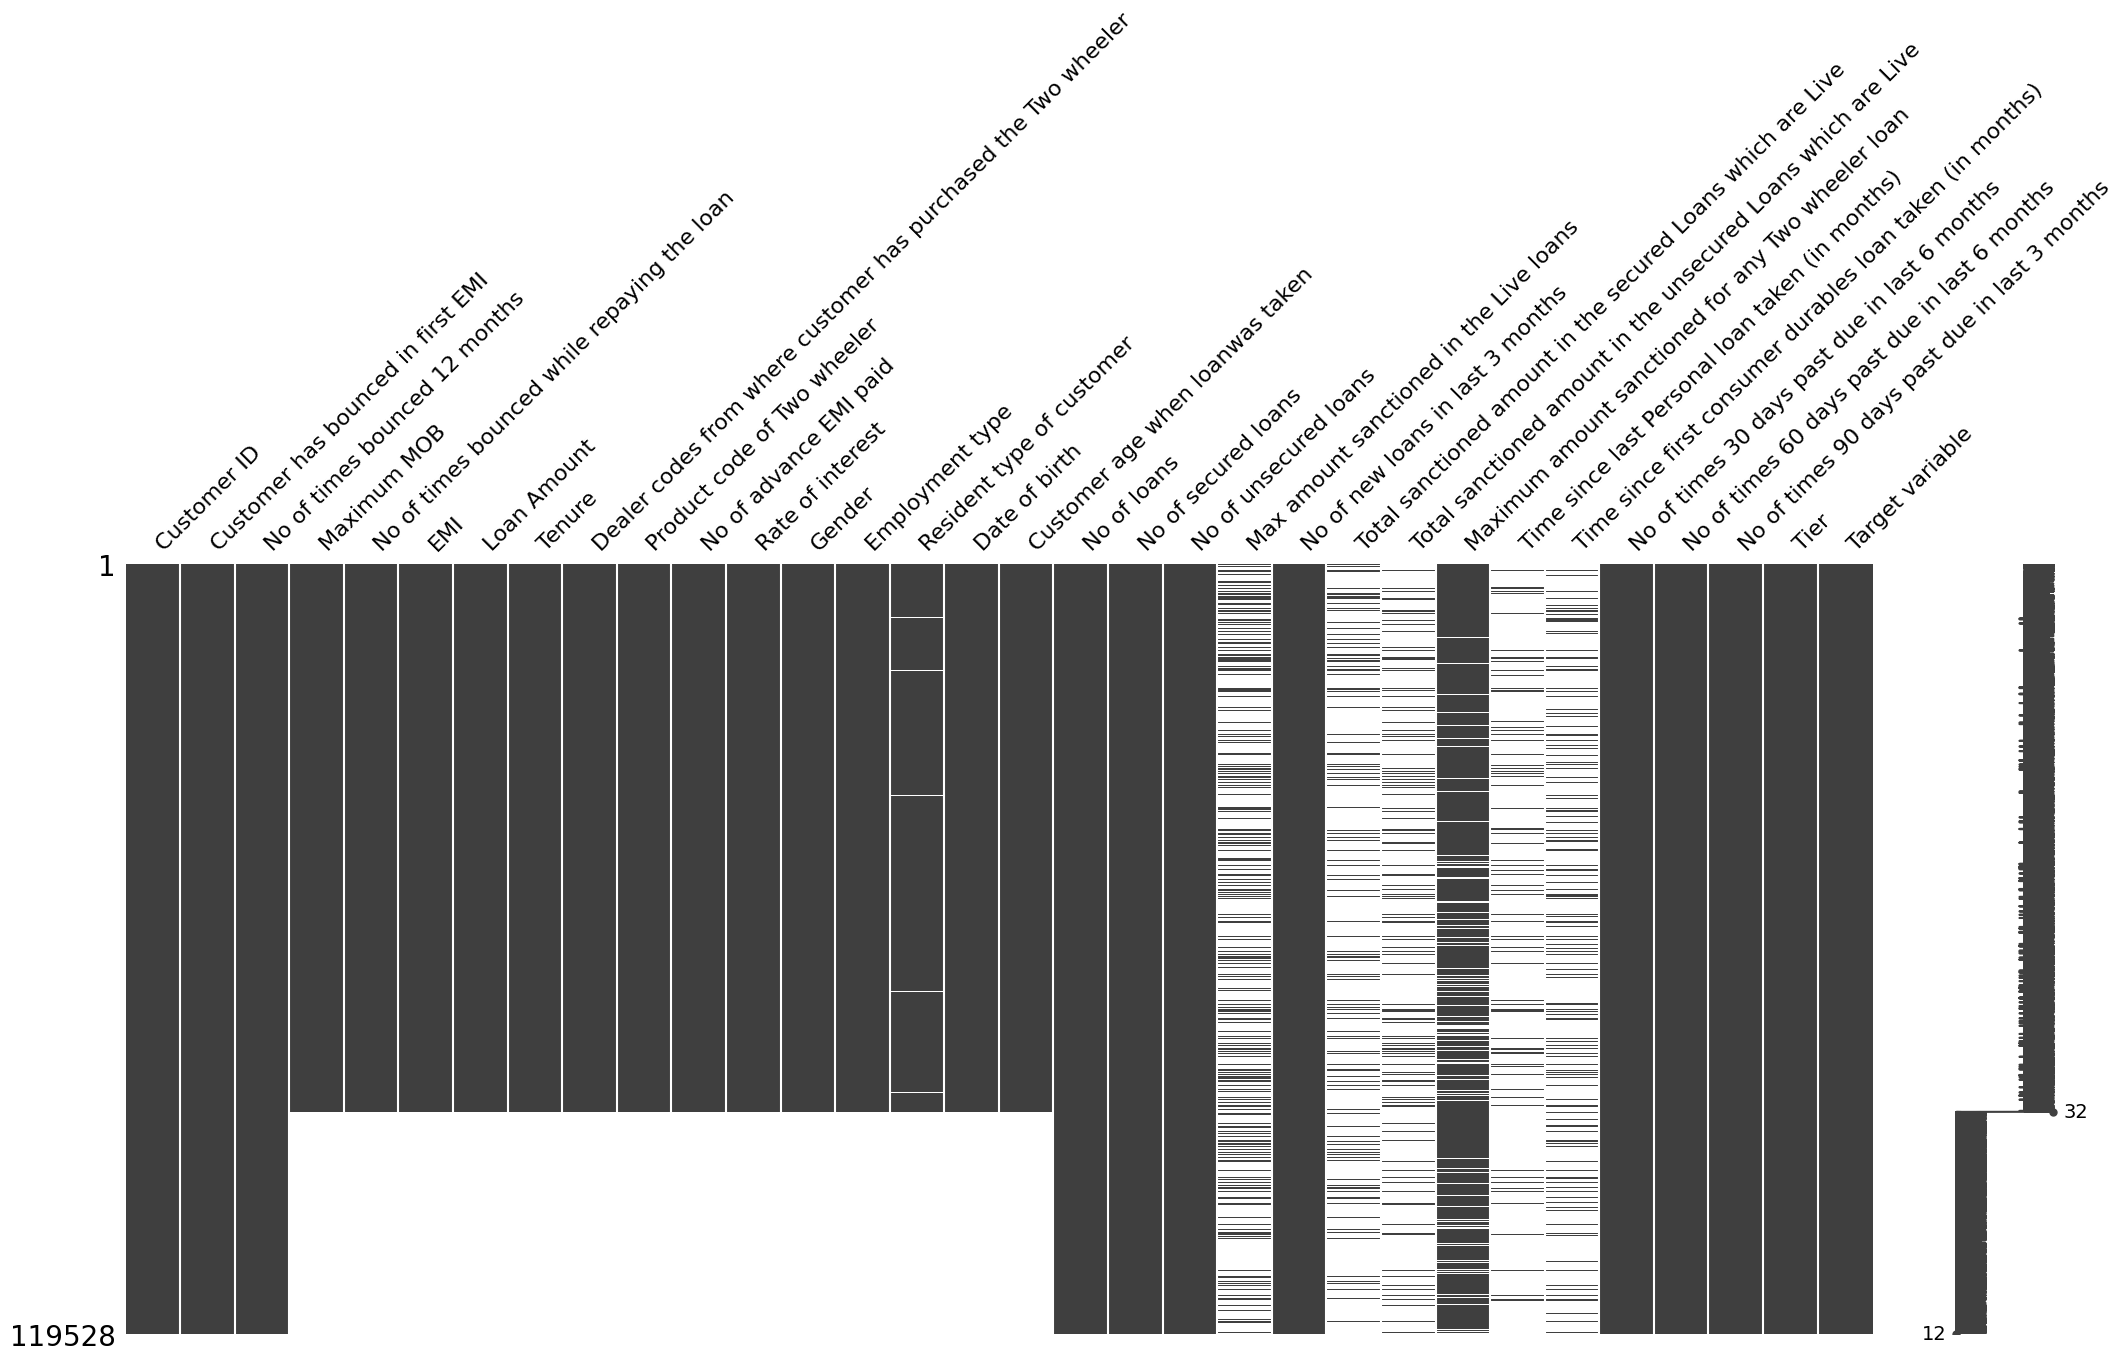

In [7]:
msno.matrix(df)

<Axes: >

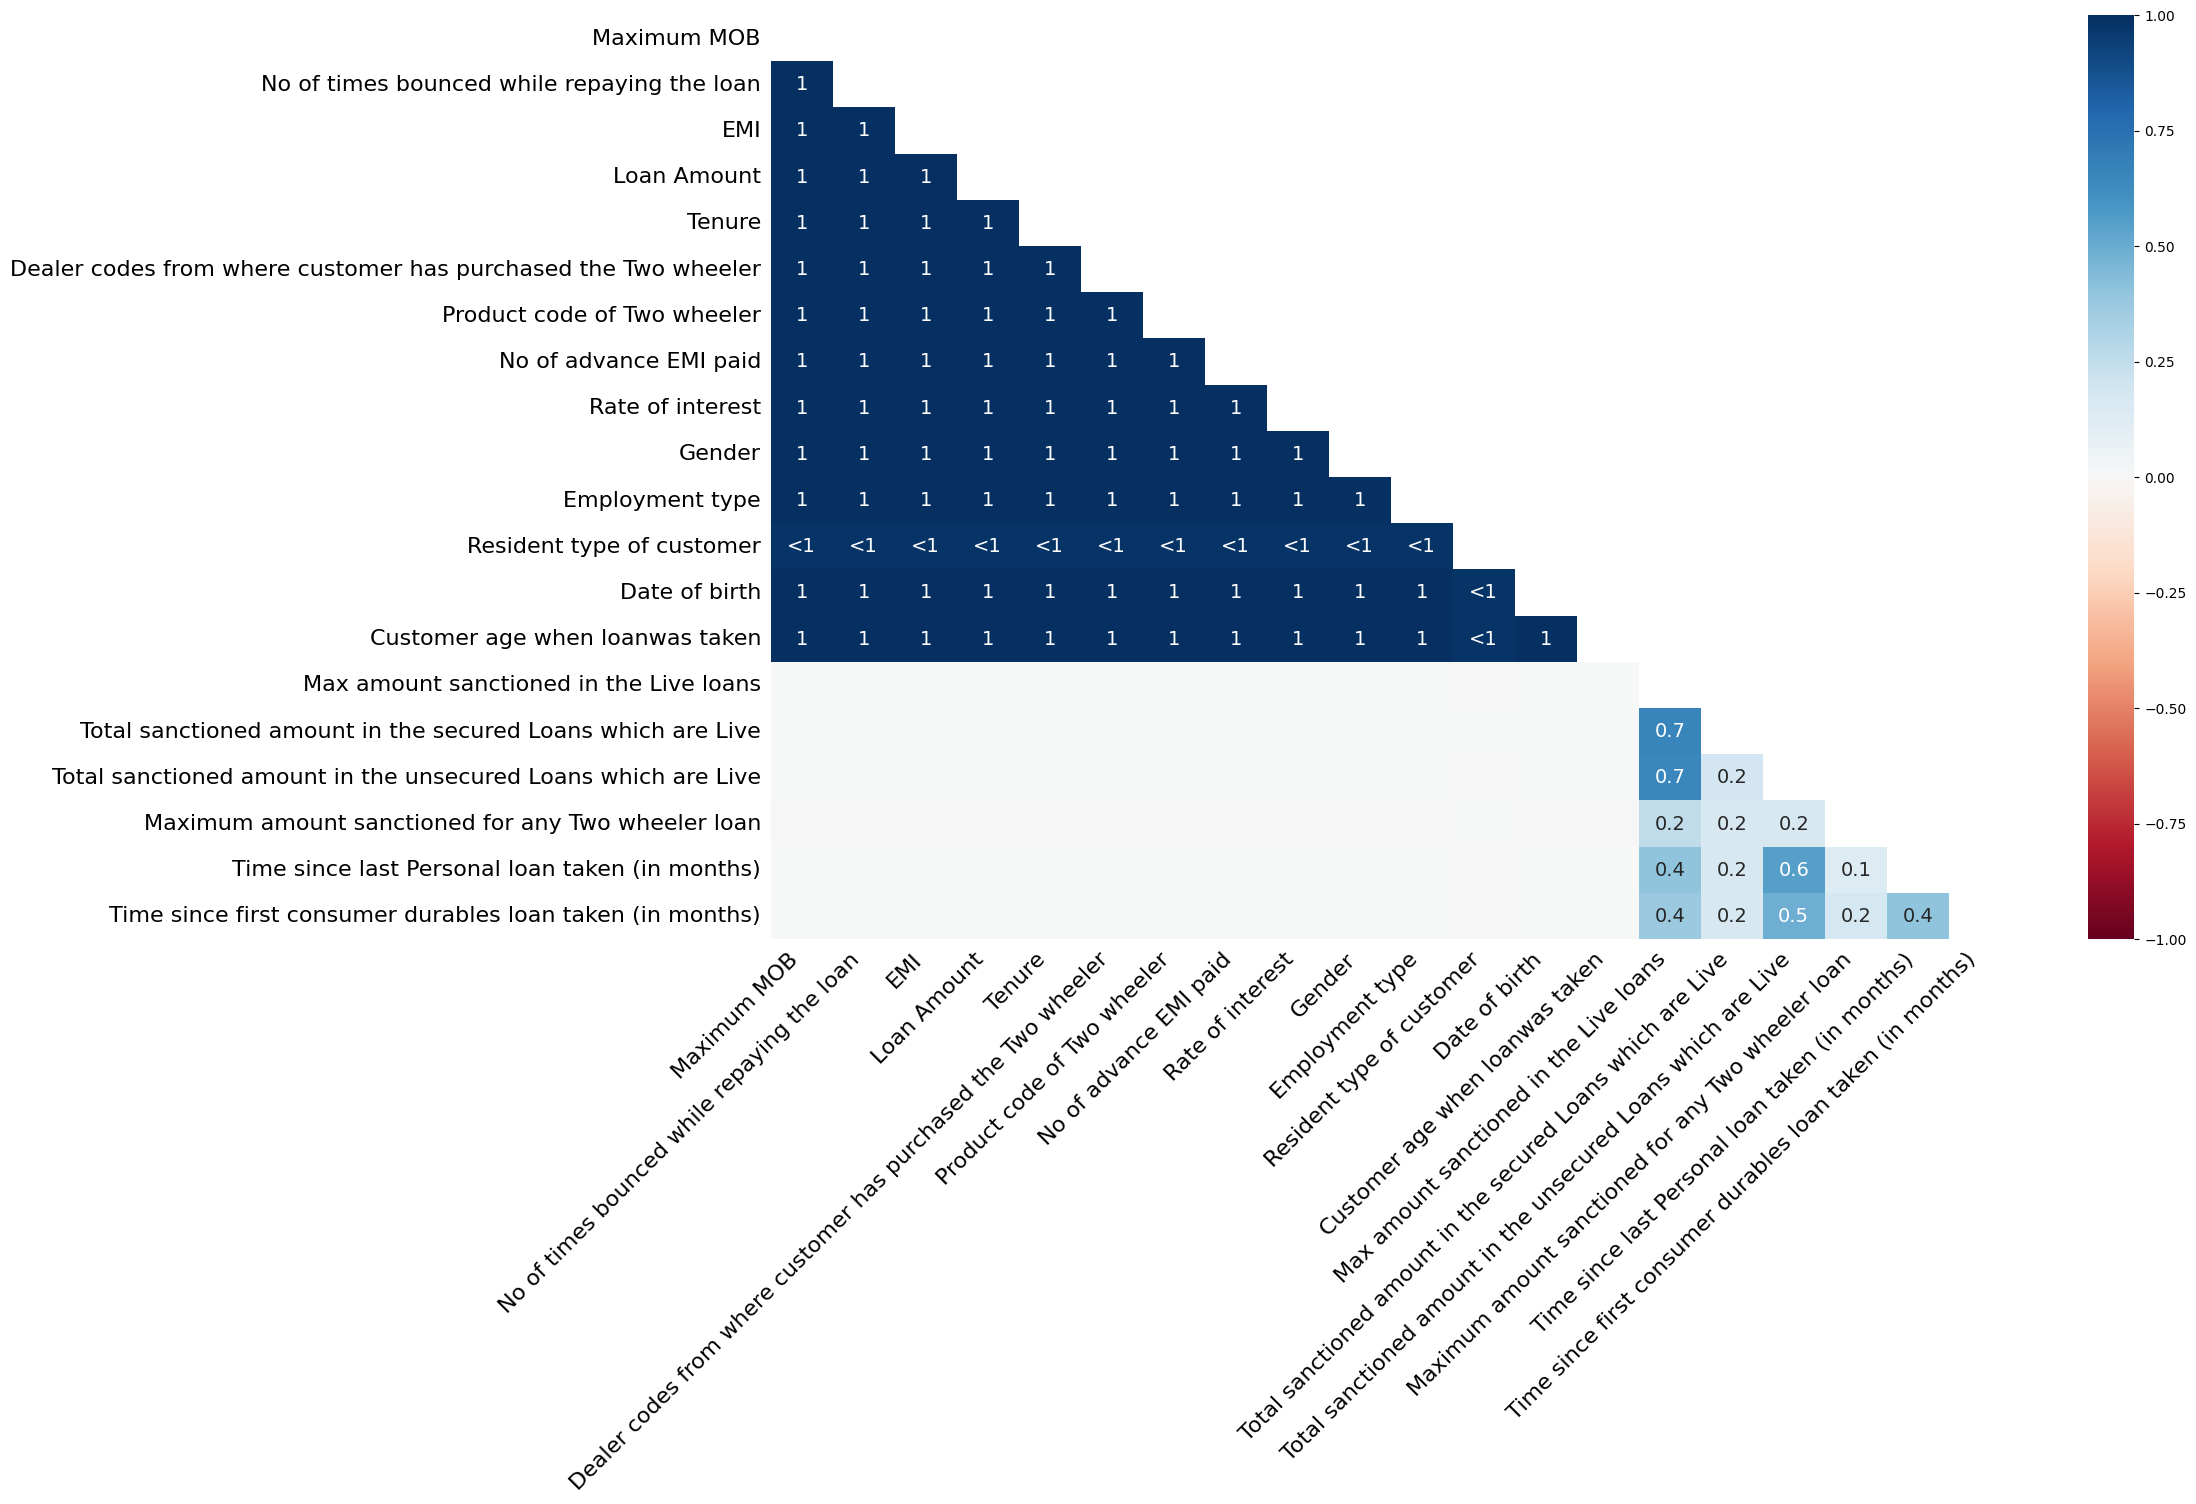

In [8]:
msno.heatmap(df)

In [9]:
# Removing irrelevant columns
df.drop(['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)'], axis = 1, inplace = True)
df.shape

(119528, 30)

In [10]:
# Missing values treatment 
df.dropna(axis=0,how='any',subset=['Loan Amount','Gender'],inplace=True)

In [11]:
df.shape

(85048, 30)

<Axes: >

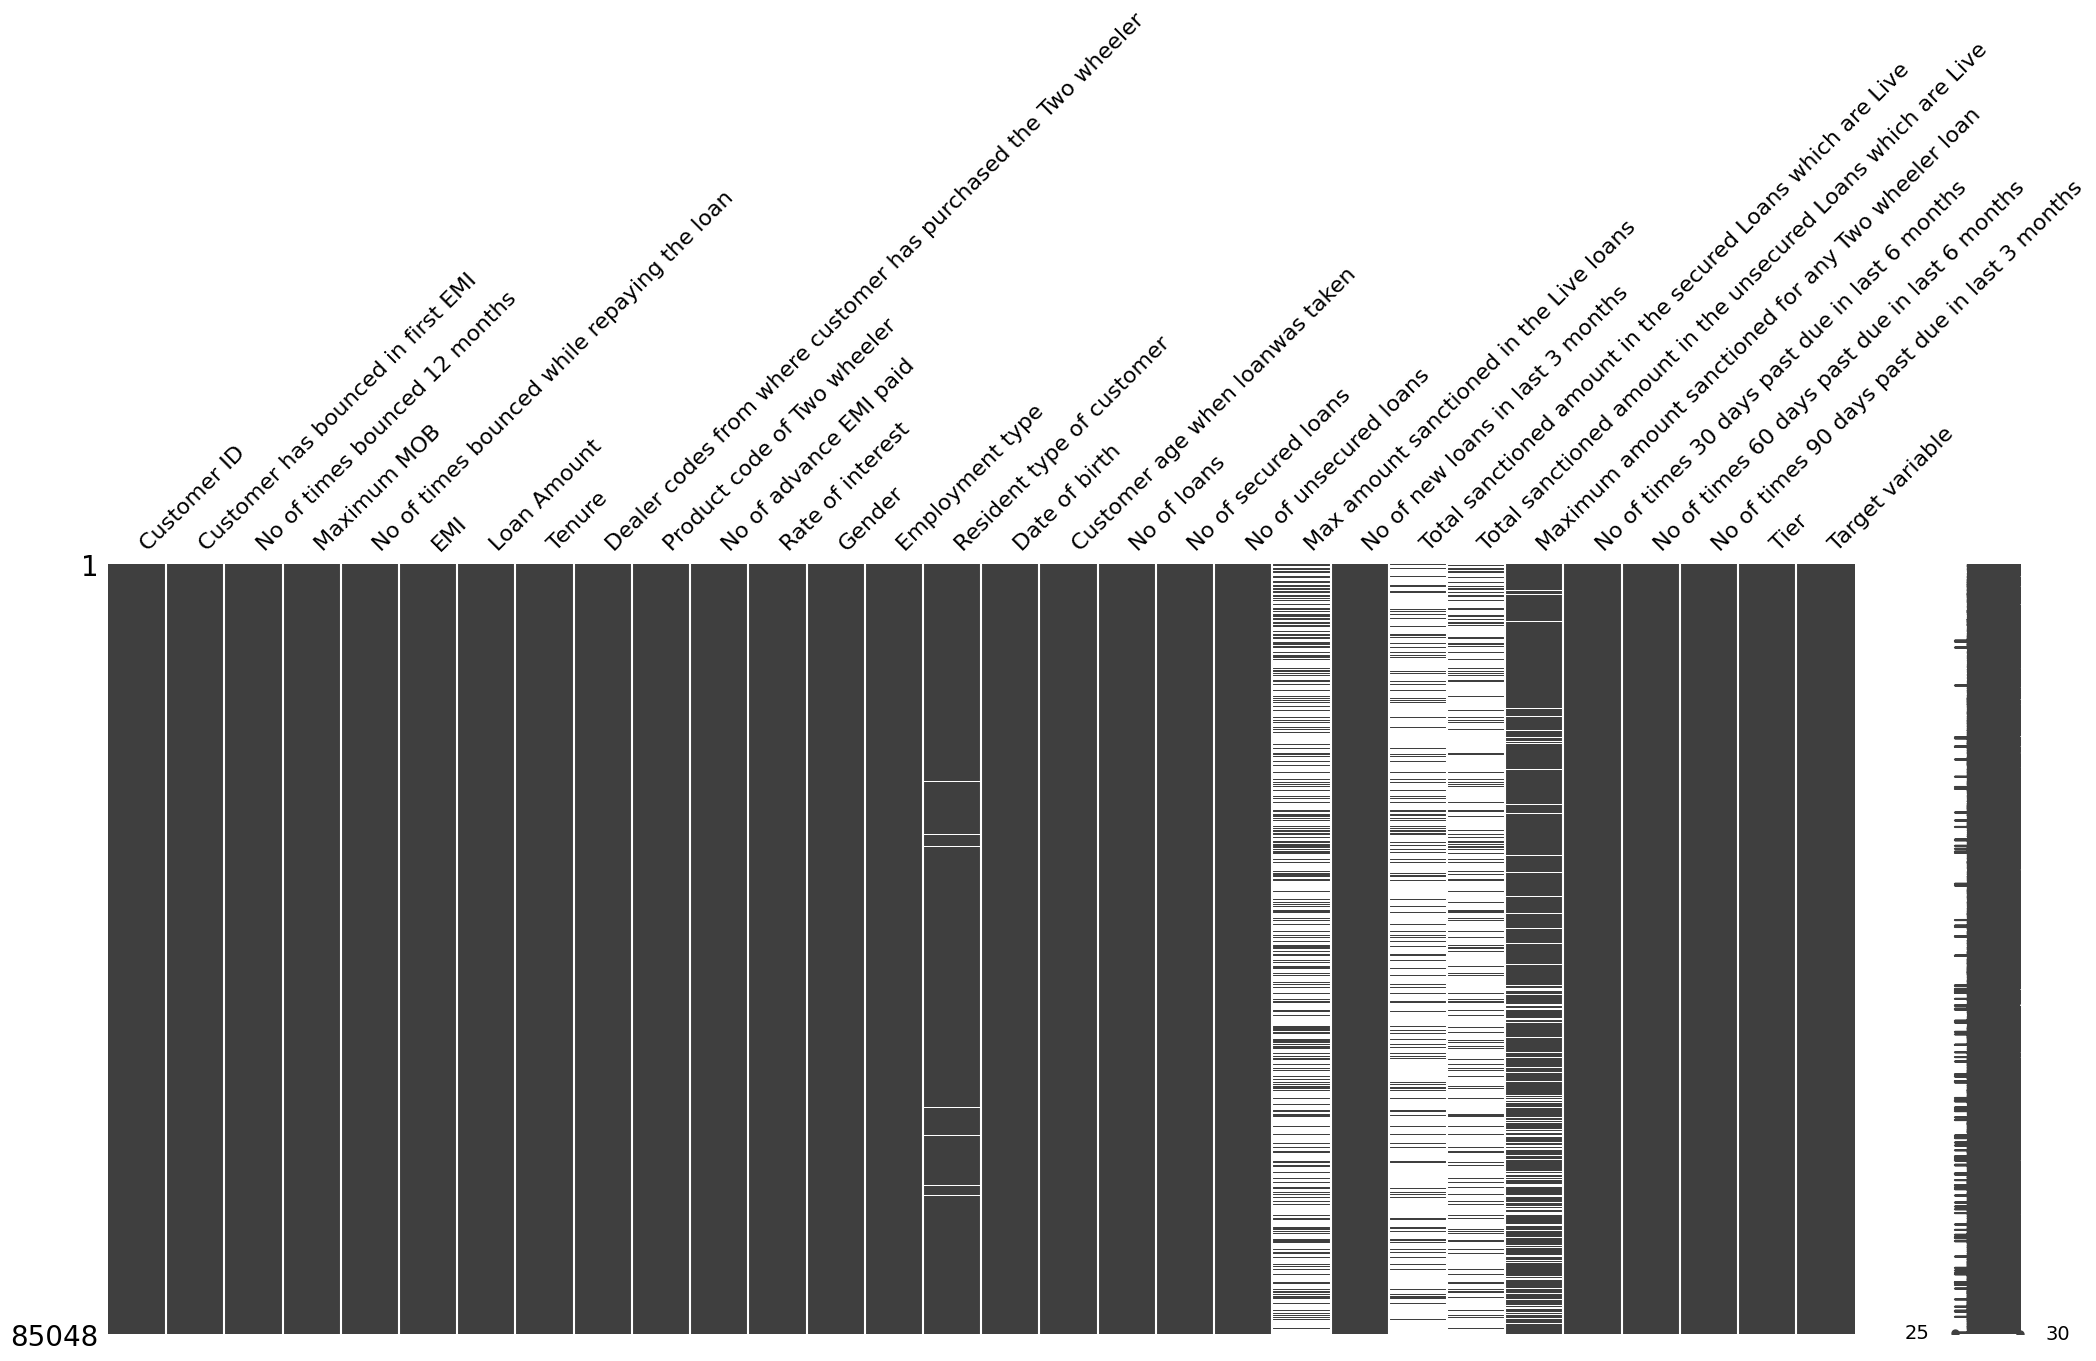

In [12]:
msno.matrix(df)

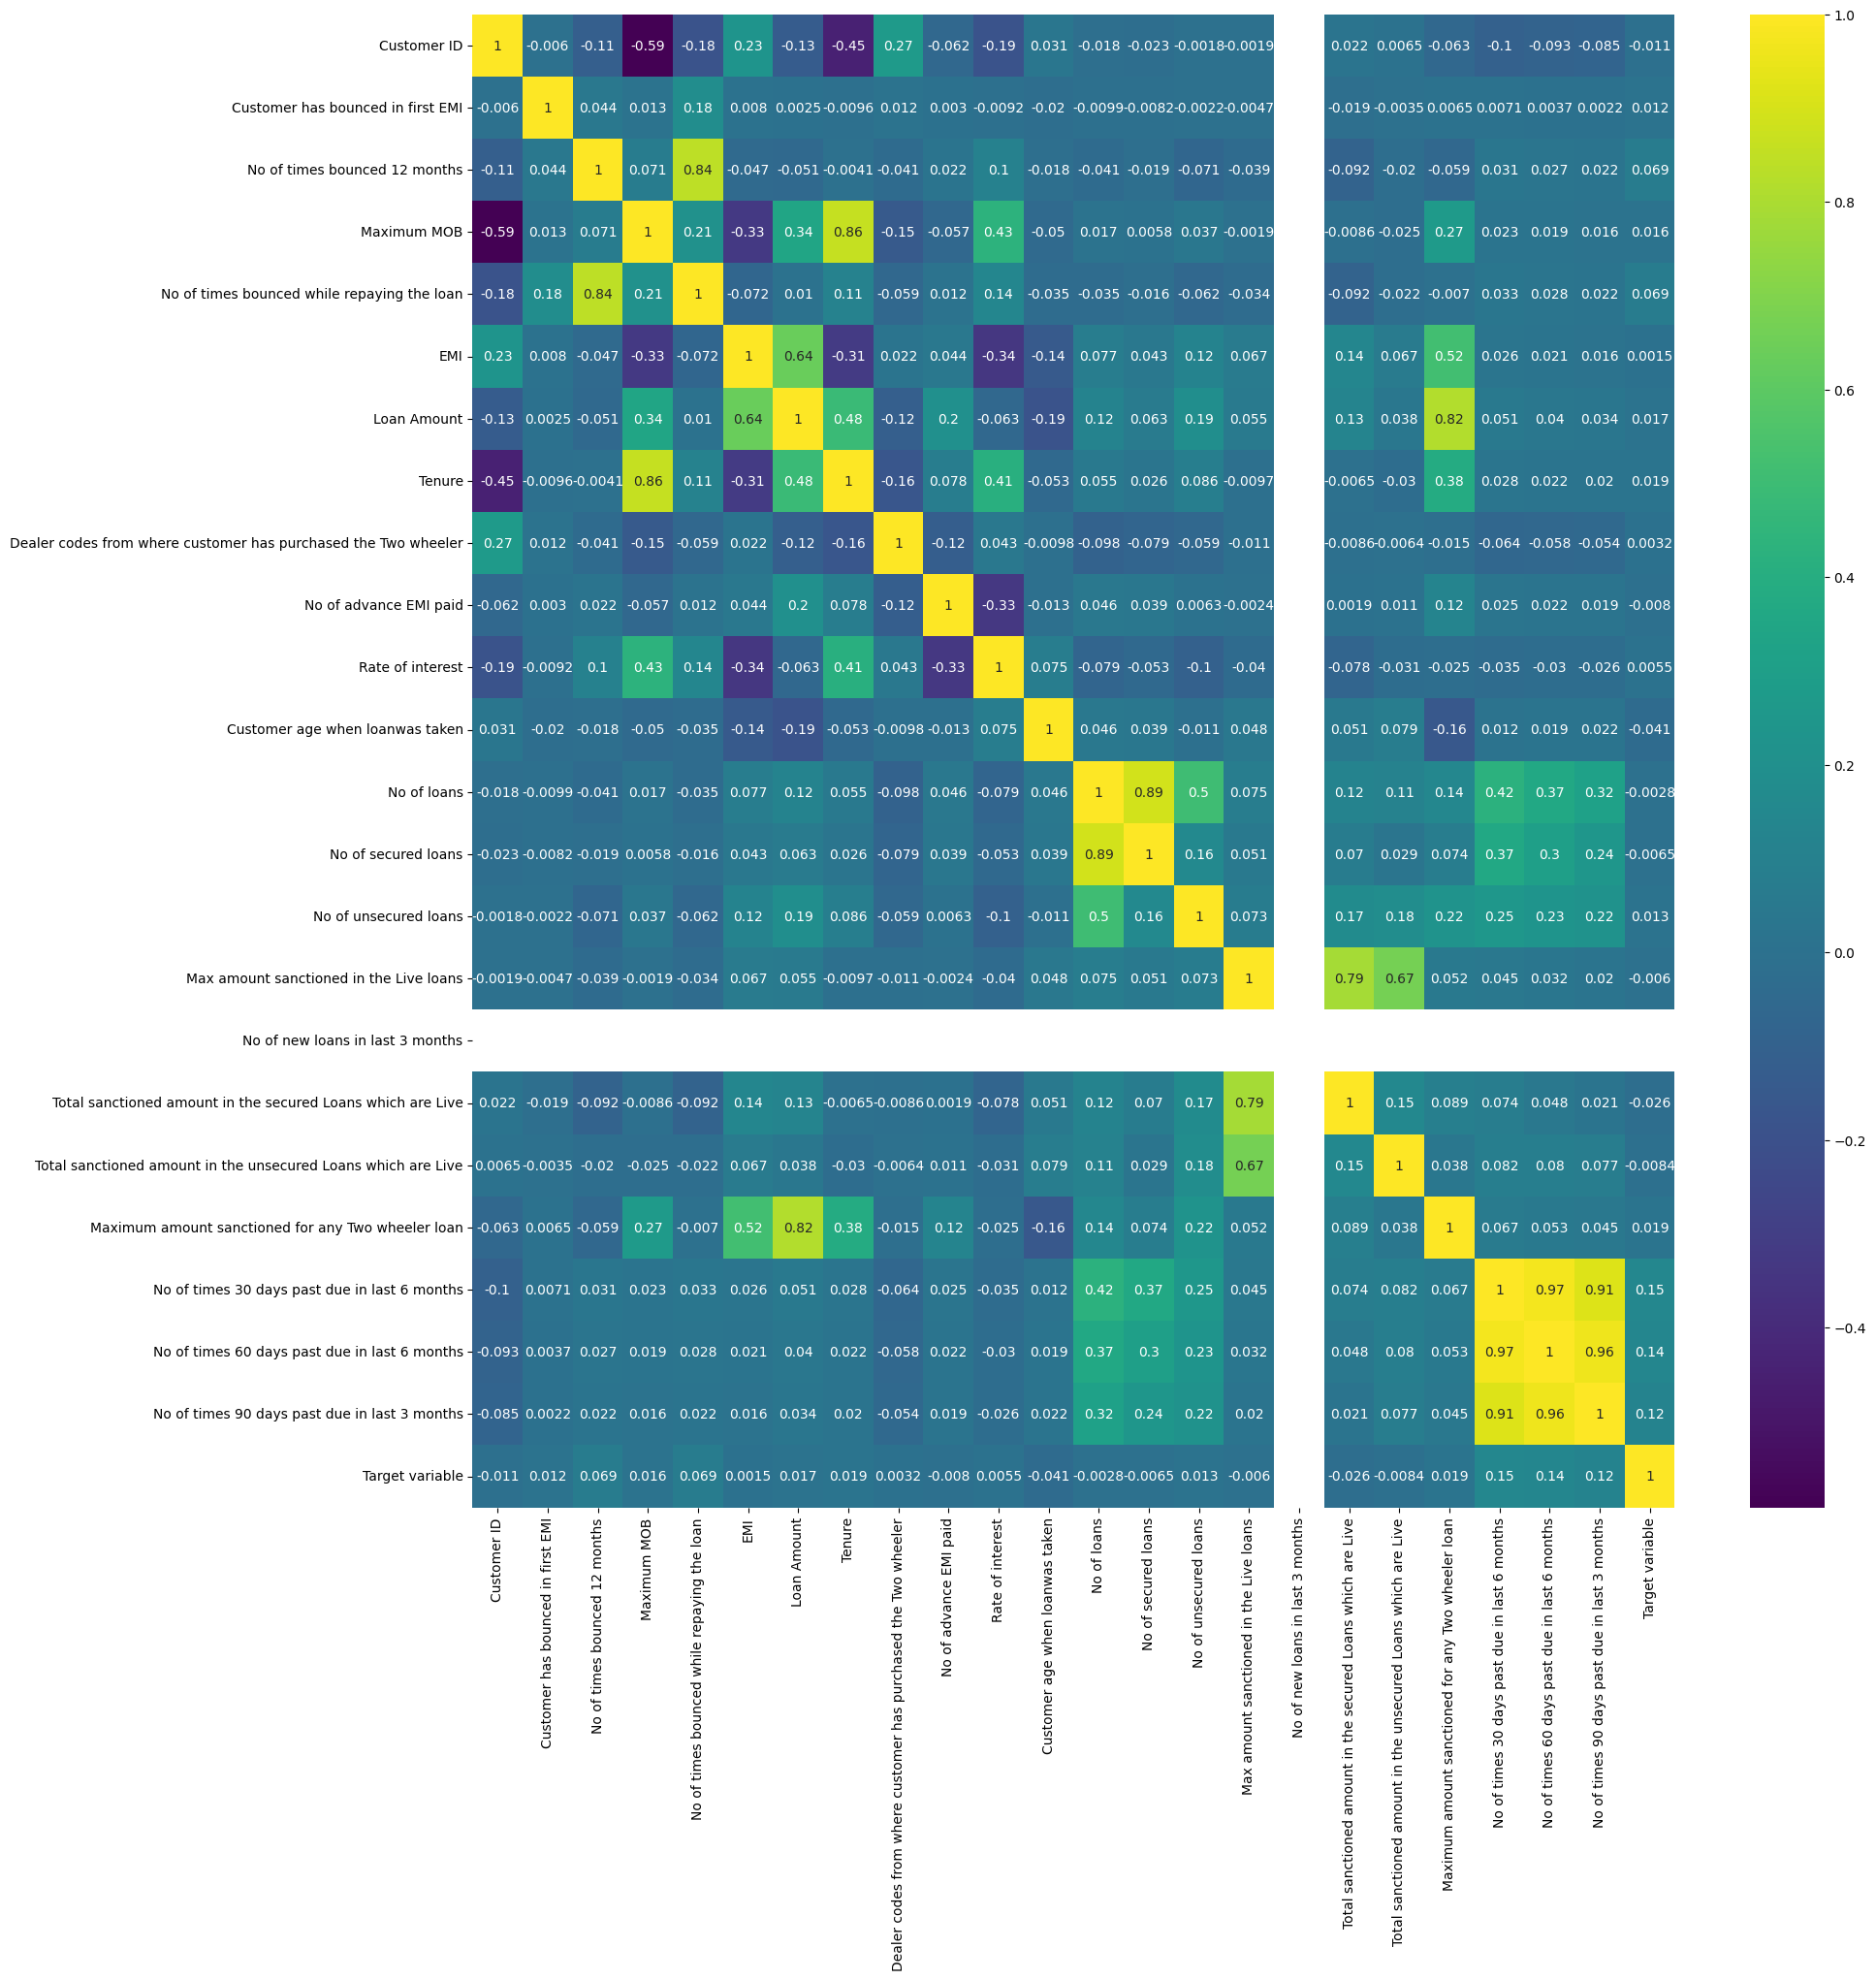

In [13]:
df_numeric = df.select_dtypes(include=['number'])
corrmat = df_numeric.corr()

#correlation matrix
corrmat = df_numeric.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_numeric[top_corr_features].corr(),annot=True,cmap="viridis")

In [14]:
print(df['Target variable'].value_counts())

Target variable
0    83194
1     1854
Name: count, dtype: int64


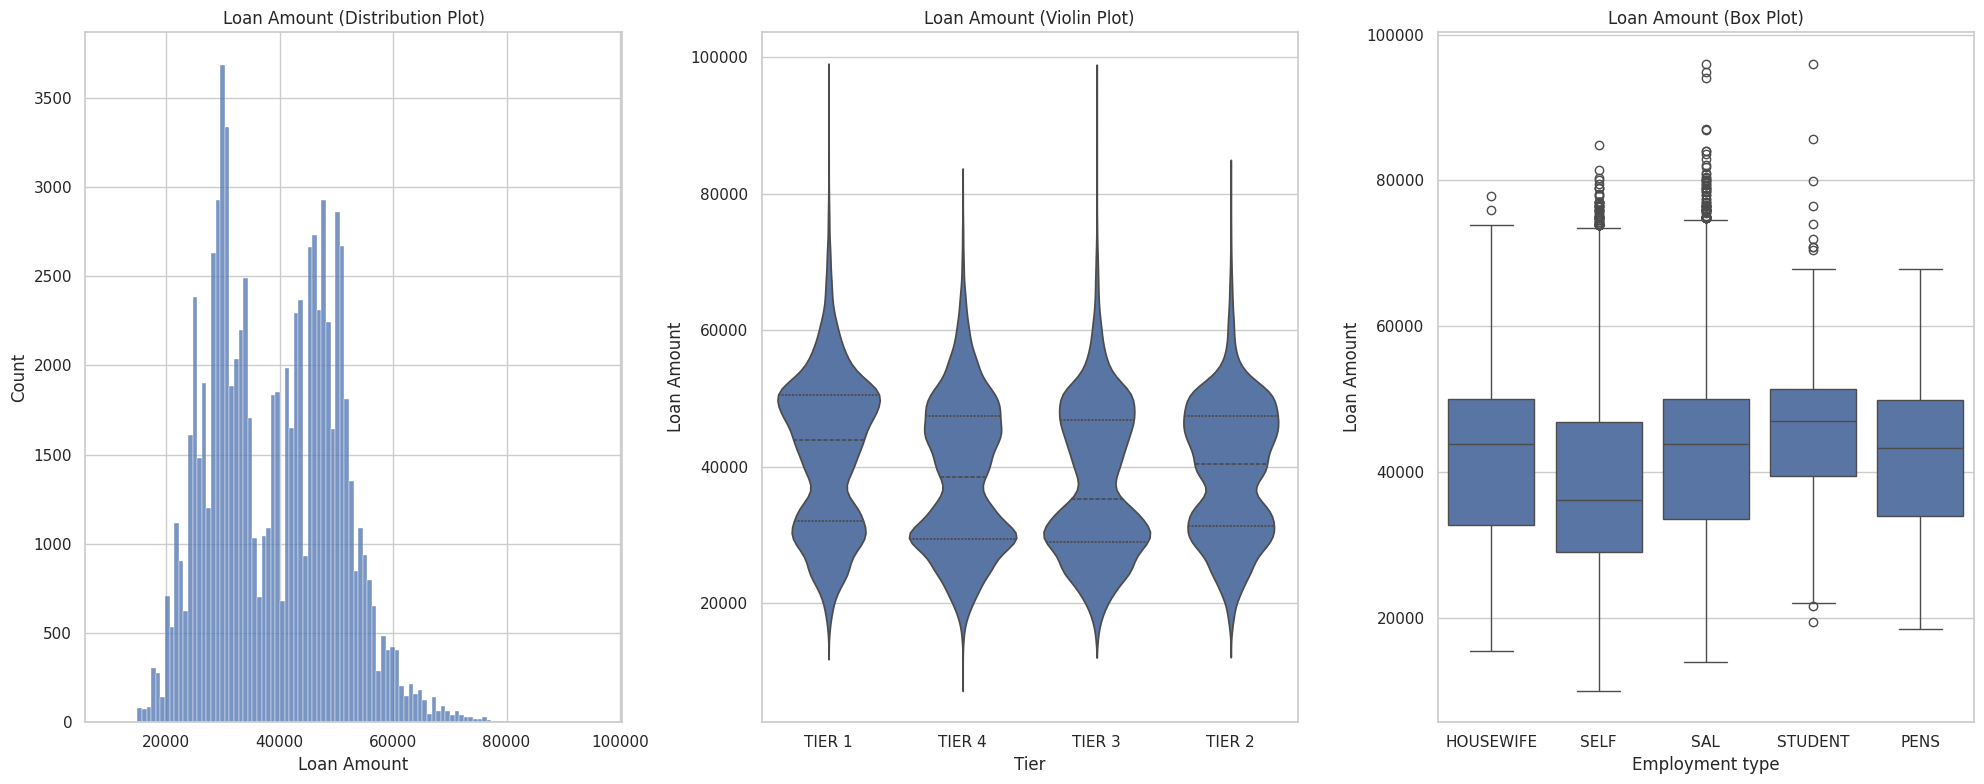

In [15]:
sns.set(style="whitegrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Loan Amount (Distribution Plot)")
sns.histplot(df['Loan Amount'],ax=ax[0])
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data = df, x='Tier',y='Loan Amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data = df, x='Employment type',y='Loan Amount',ax=ax[2],orient='v')
plt.tight_layout()
plt.show()

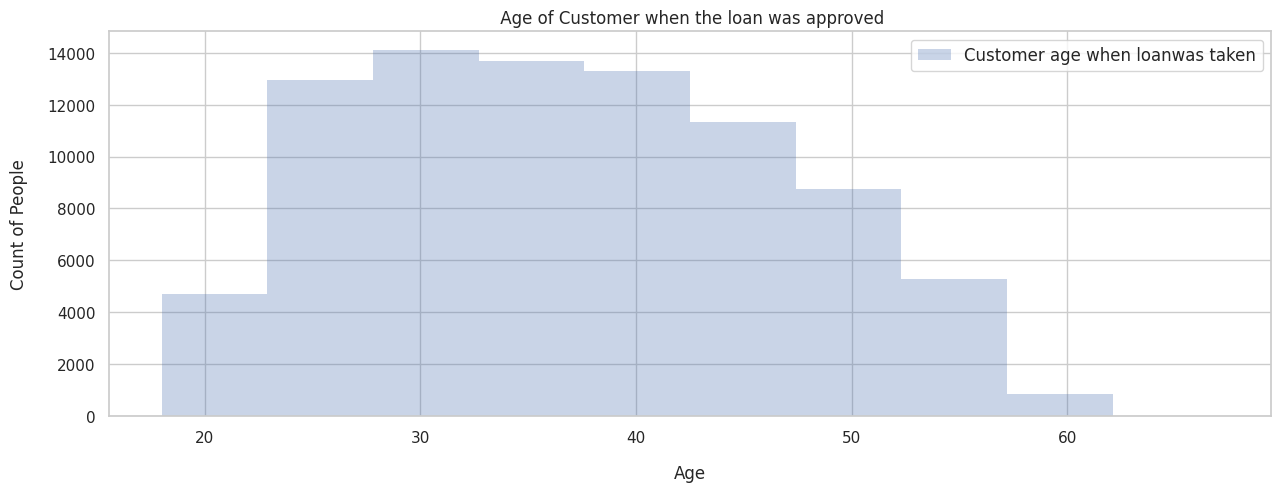

In [16]:
##Age- age at which the client took the loan
plt.figure(figsize=(15,5))

#bar plot
df['Customer age when loanwas taken'].plot(kind='hist',color='b',alpha=0.3, edgecolor='none')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})
plt.show()

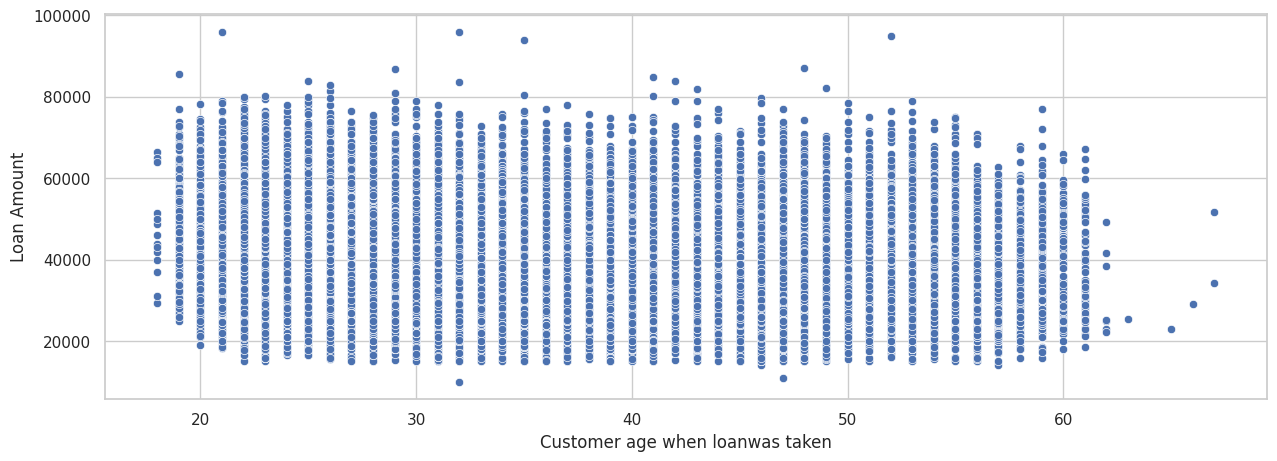

In [17]:
# Explore correlation between age and loan amount 
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Customer age when loanwas taken'],y='Loan Amount',data=df)
plt.show()

In [18]:
df['Gender'].value_counts()

Gender
MALE      73608
FEMALE    11440
Name: count, dtype: int64

### Get dummies

In [19]:
df = pd.get_dummies(df, columns=['Gender'])

In [20]:
df.shape

(85048, 31)

In [21]:
df.columns

Index(['Customer ID', 'Customer has bounced in first EMI',
       'No of times bounced 12 months', 'Maximum MOB',
       'No of times bounced while repaying the loan', 'EMI', 'Loan Amount',
       'Tenure',
       'Dealer codes from where customer has purchased the Two wheeler',
       'Product code of Two wheeler', 'No of advance EMI paid',
       'Rate of interest', 'Employment type', 'Resident type of customer',
       'Date of birth', 'Customer age when loanwas taken', 'No of loans',
       'No of secured loans', 'No of unsecured loans',
       'Max amount sanctioned in the Live loans',
       'No of new loans in last 3 months',
       'Total sanctioned amount in the secured Loans which are Live',
       'Total sanctioned amount in the unsecured Loans which are Live',
       'Maximum amount sanctioned for any Two wheeler loan',
       'No of times 30 days past due in last 6 months',
       'No of times 60 days past due in last 6 months',
       'No of times 90 days past due in last

In [22]:
dropped=['Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan']

df.drop(dropped,axis=1,inplace=True)

In [23]:
df.shape

(85048, 27)

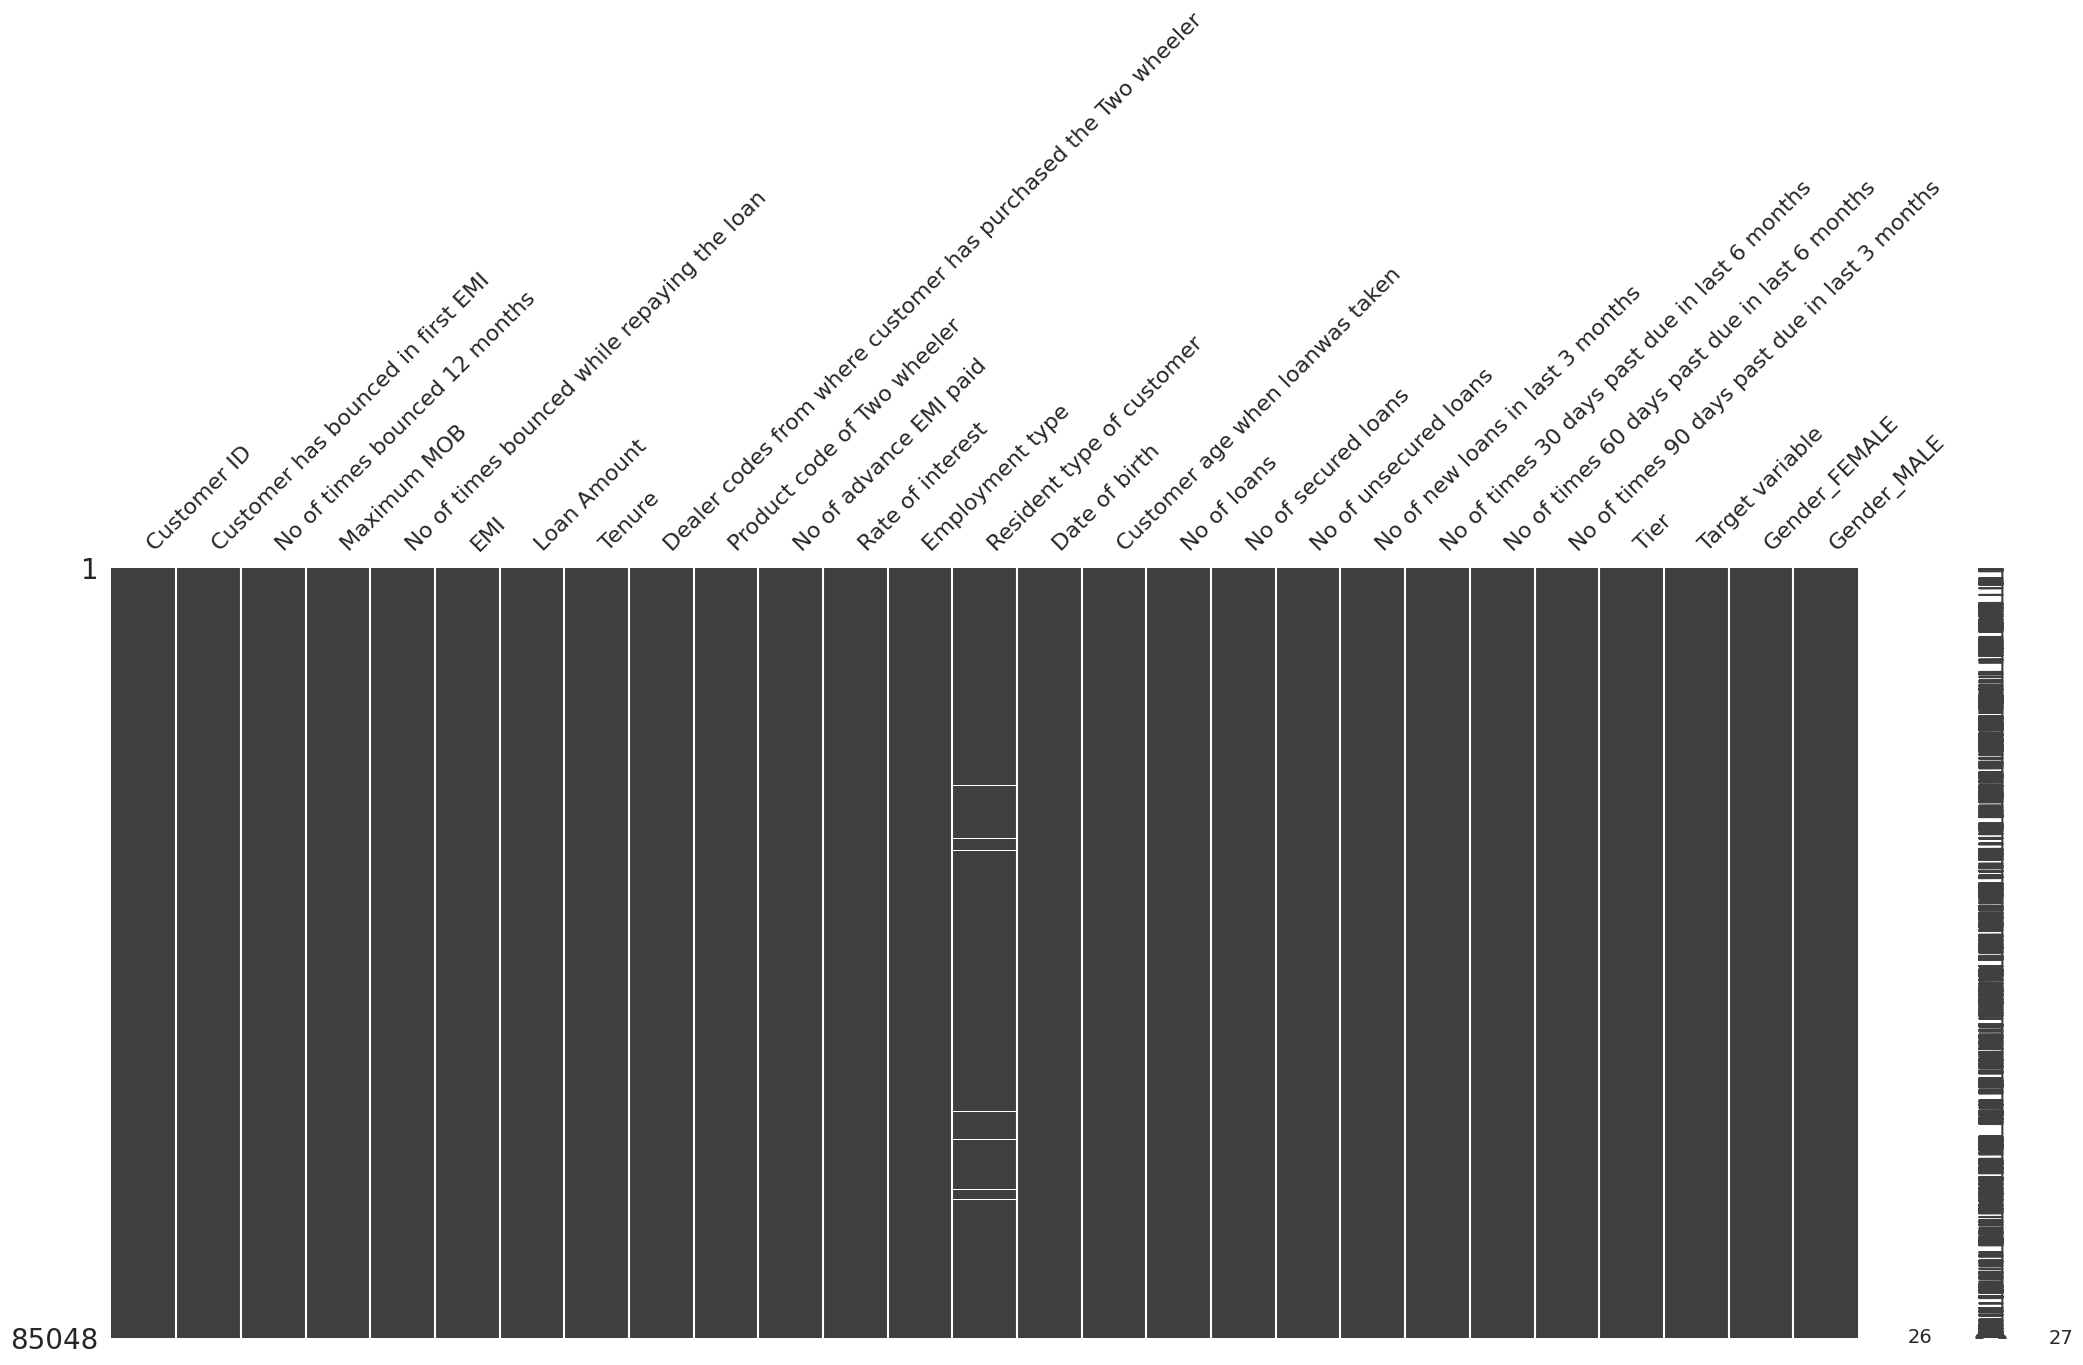

In [24]:
msno.matrix(df)
plt.show()

In [25]:
df=df.copy()

## Standardizing column names

In [26]:
CatVariables = df.select_dtypes(include=['object'])
NumVariables = df.select_dtypes(include=['float','int'])

#standardizing column names for easier usage
df.columns=df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
CatVariables=CatVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
NumVariables=NumVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [27]:
df.columns

Index(['customer_id', 'customer_has_bounced_in_first_emi',
       'no_of_times_bounced_12_months', 'maximum_mob',
       'no_of_times_bounced_while_repaying_the_loan', 'emi', 'loan_amount',
       'tenure',
       'dealer_codes_from_where_customer_has_purchased_the_two_wheeler',
       'product_code_of_two_wheeler', 'no_of_advance_emi_paid',
       'rate_of_interest', 'employment_type', 'resident_type_of_customer',
       'date_of_birth', 'customer_age_when_loanwas_taken', 'no_of_loans',
       'no_of_secured_loans', 'no_of_unsecured_loans',
       'no_of_new_loans_in_last_3_months',
       'no_of_times_30_days_past_due_in_last_6_months',
       'no_of_times_60_days_past_due_in_last_6_months',
       'no_of_times_90_days_past_due_in_last_3_months', 'tier',
       'target_variable', 'gender_female', 'gender_male'],
      dtype='object')

## Imputing

In [28]:
#For quantitative data
from sklearn.impute import SimpleImputer
numerical_cols = df[NumVariables]
categorical_cols = df[CatVariables]

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
lat = imp_mean.fit_transform(numerical_cols)
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
g_se = imp_mode.fit_transform(categorical_cols)

In [29]:
df[CatVariables]=g_se
df[NumVariables]=lat

<Axes: >

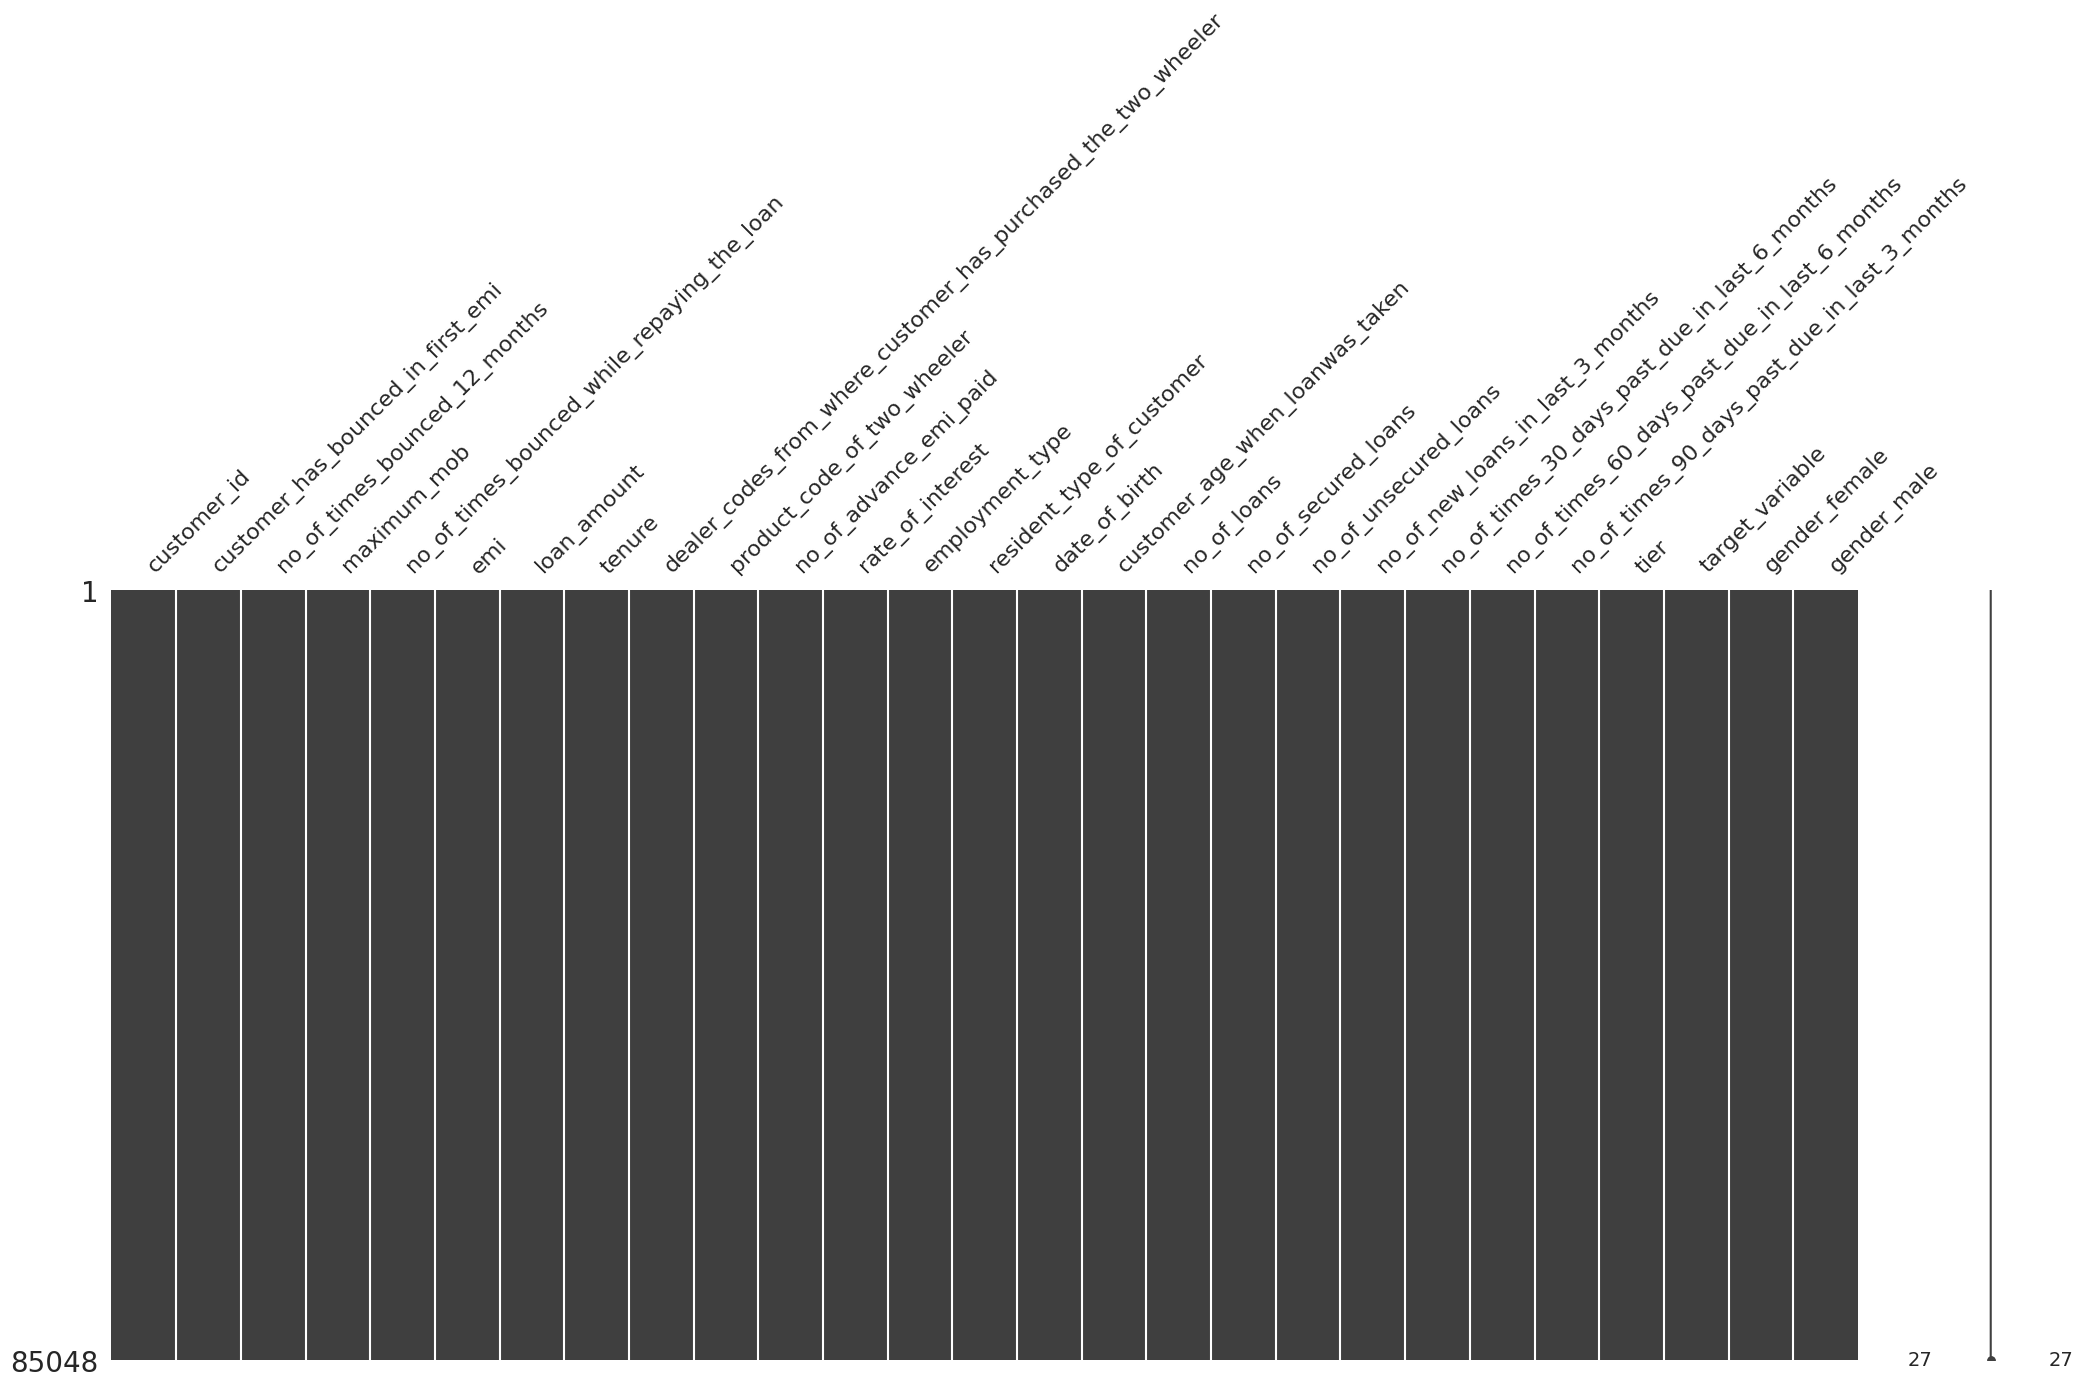

In [30]:
msno.matrix(df)

## Encoding

In [31]:
# Dealing with categorical columns
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in CatVariables:
    df[feature] = le.fit_transform(df[feature].astype(str))

## SMOTE

In [32]:
X=df.drop(['customer_id','target_variable'],axis=1)
y=df[["target_variable"]]

In [33]:
from imblearn.over_sampling import SMOTE

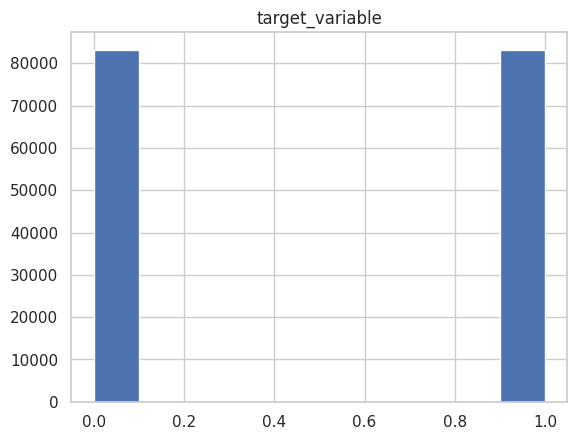

In [34]:

smote_sample=SMOTE(random_state=124,sampling_strategy='auto') # the sampling strategy can be one of float, str, dict or callable `float``,
#it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling ie {1:500}
# ``'minority'``: resample only  minority class; 'not minority'``:all but the minority class; ``'not majority'``: all but the majority, ``'all'`` ,``'auto'``:
x_res, y_res=smote_sample.fit_resample(X,y)


# now plot the classes
y_res.hist()
plt.show()

In [35]:
import pandas as pd

# Convert y_res to a DataFrame
y_res_df = pd.DataFrame(y_res, columns=['target_variable'])

# Combine resampled X and y back into a single DataFrame
df_resampled = pd.concat([pd.DataFrame(x_res, columns=X.columns), y_res_df], axis=1)

# Identify the newly generated samples (rows that are not in the original dataset)
df_synthetic = df_resampled.loc[len(X):].reset_index(drop=True)  # Assuming SMOTE-generated rows come after original rows

# Assign customer_id for the synthetic data (if applicable)
df_synthetic['customer_id'] = range(len(df), len(df) + len(df_synthetic))

# Merge with the original dataset
df_final = pd.concat([df, df_synthetic], axis=0, ignore_index=True)

# Display the new dataset shape
print(df_final.shape)


(166388, 27)


<Axes: >

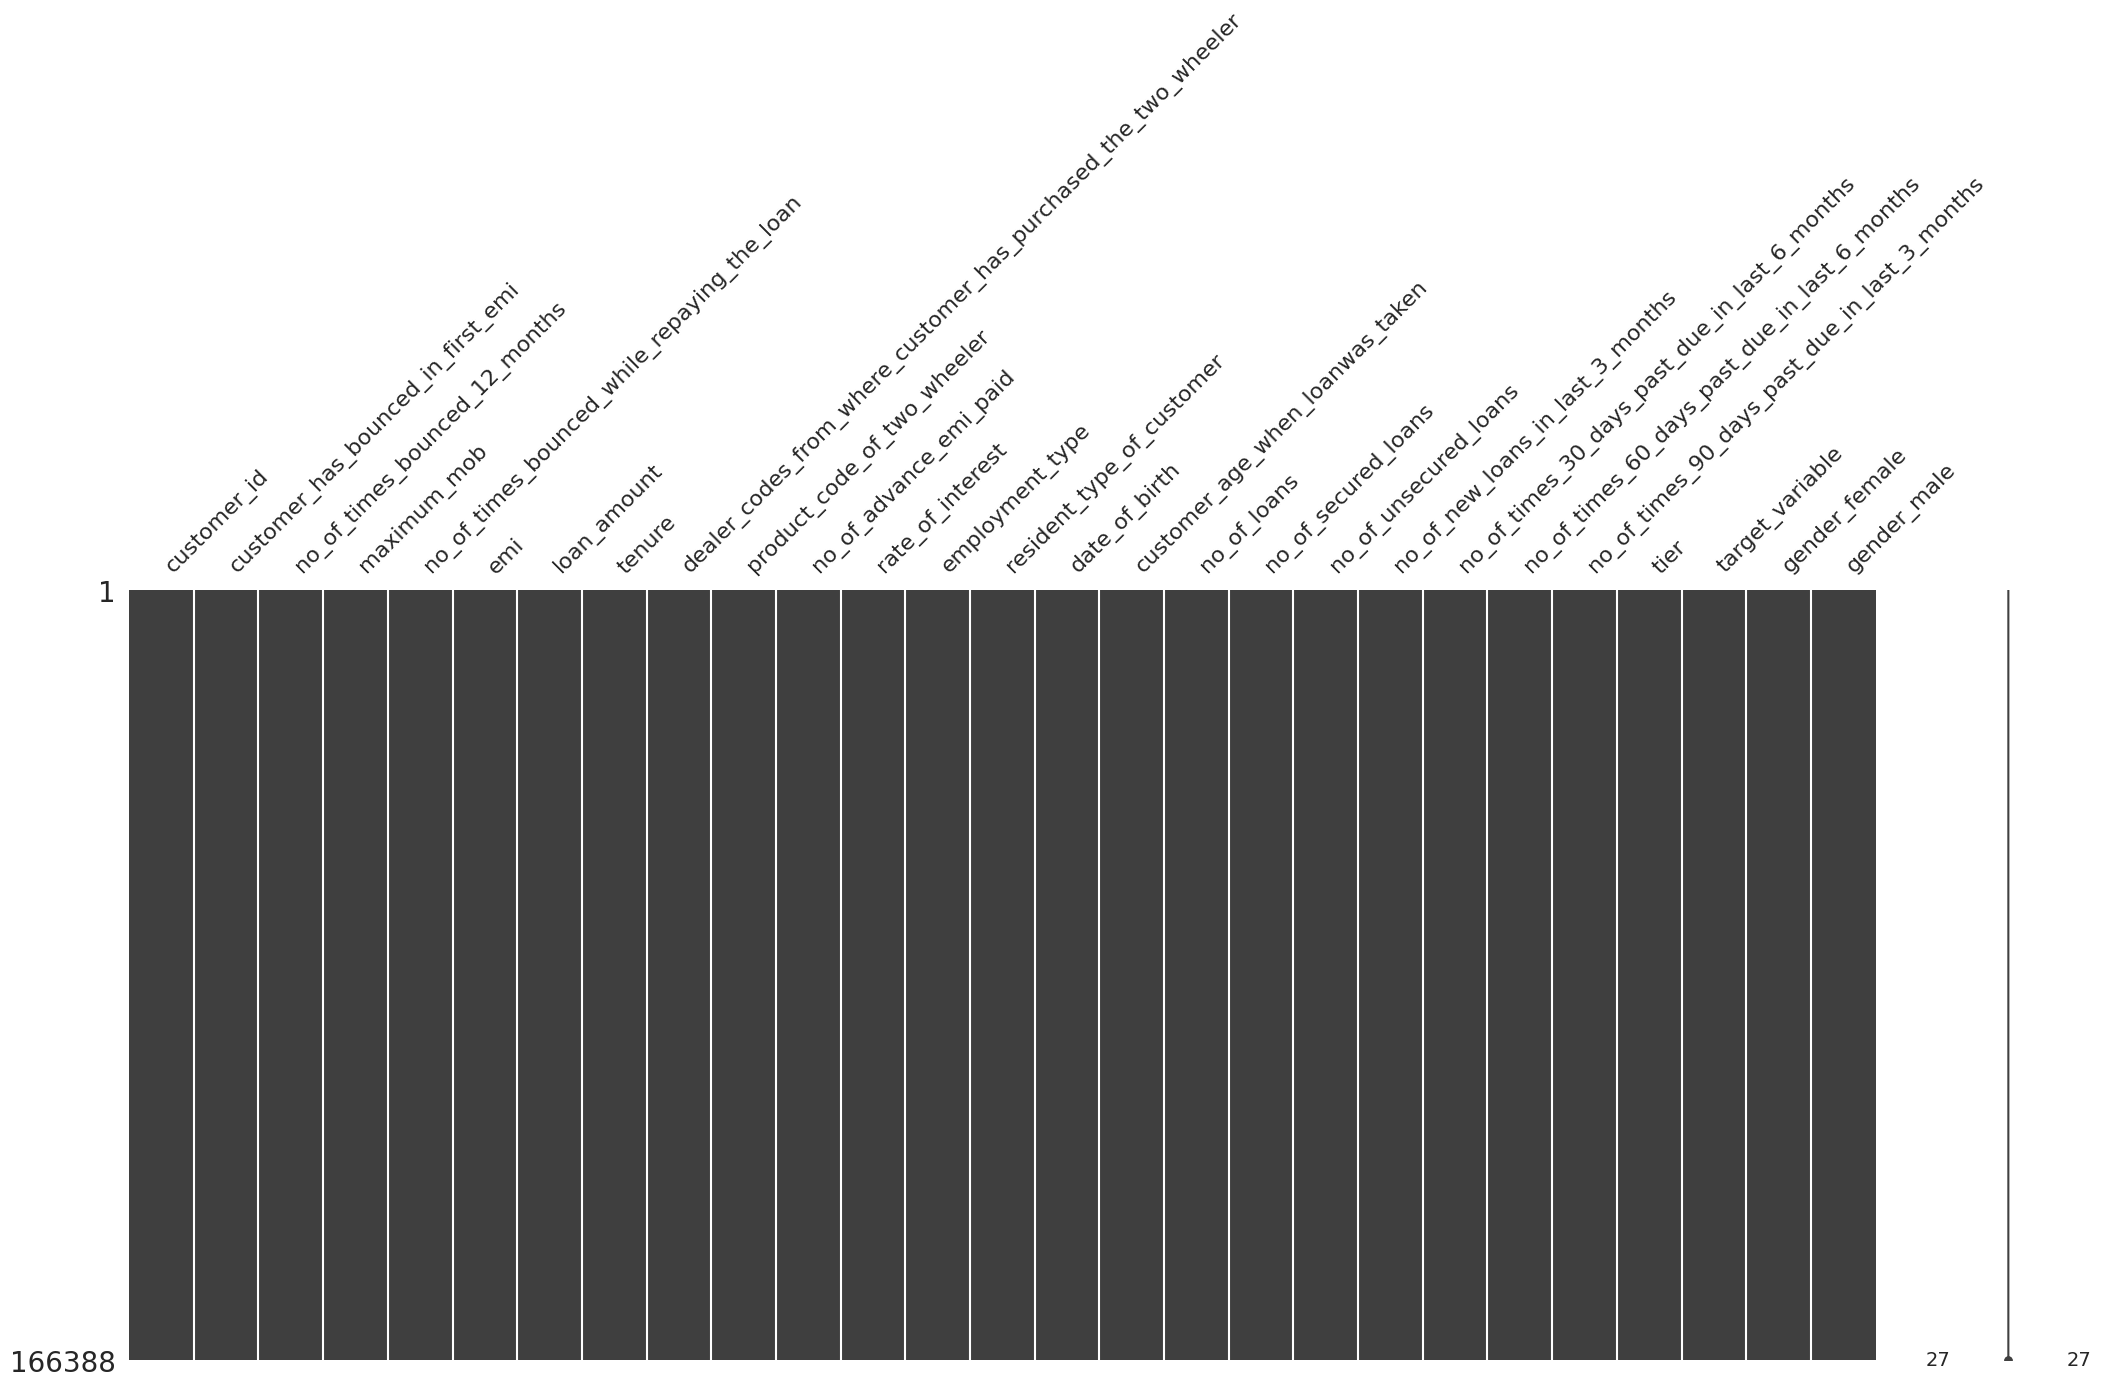

In [36]:
msno.matrix(df_final)

In [37]:
df_final.head()

,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,...,no_of_secured_loans,no_of_unsecured_loans,no_of_new_loans_in_last_3_months,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable,gender_female,gender_male
0,1.0,0.0,0.0,24.0,0.0,2432.0,46500.0,24.0,1385.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,True,False
1,2.0,0.0,1.0,24.0,1.0,1495.0,28168.0,24.0,2496.0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,False,True
2,3.0,0.0,0.0,26.0,0.0,1707.0,38900.0,30.0,1346.0,3,...,6.0,3.0,0.0,31.0,31.0,16.0,0,0.0,False,True
3,4.0,0.0,0.0,24.0,0.0,2128.0,42900.0,24.0,1375.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,True,False
4,5.0,0.0,0.0,27.0,0.0,1824.0,40900.0,30.0,4140.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,False,True


In [38]:
df_final.shape

(166388, 27)

## Scaling

In [39]:
num_cols = ['customer_has_bounced_in_first_emi',
       'no_of_times_bounced_12_months', 'maximum_mob',
       'no_of_times_bounced_while_repaying_the_loan', 'emi', 'loan_amount',
       'tenure',
       'dealer_codes_from_where_customer_has_purchased_the_two_wheeler',
       'product_code_of_two_wheeler', 'no_of_advance_emi_paid',
       'rate_of_interest', 'employment_type', 'resident_type_of_customer',
       'date_of_birth', 'customer_age_when_loanwas_taken', 'no_of_loans',
       'no_of_secured_loans', 'no_of_unsecured_loans',
       'no_of_new_loans_in_last_3_months',
       'no_of_times_30_days_past_due_in_last_6_months',
       'no_of_times_60_days_past_due_in_last_6_months',
       'no_of_times_90_days_past_due_in_last_3_months', 'tier',
       'gender_female', 'gender_male']

/tmp/ipykernel_27733/4129378301.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_final[col], fill=True, color='blue')


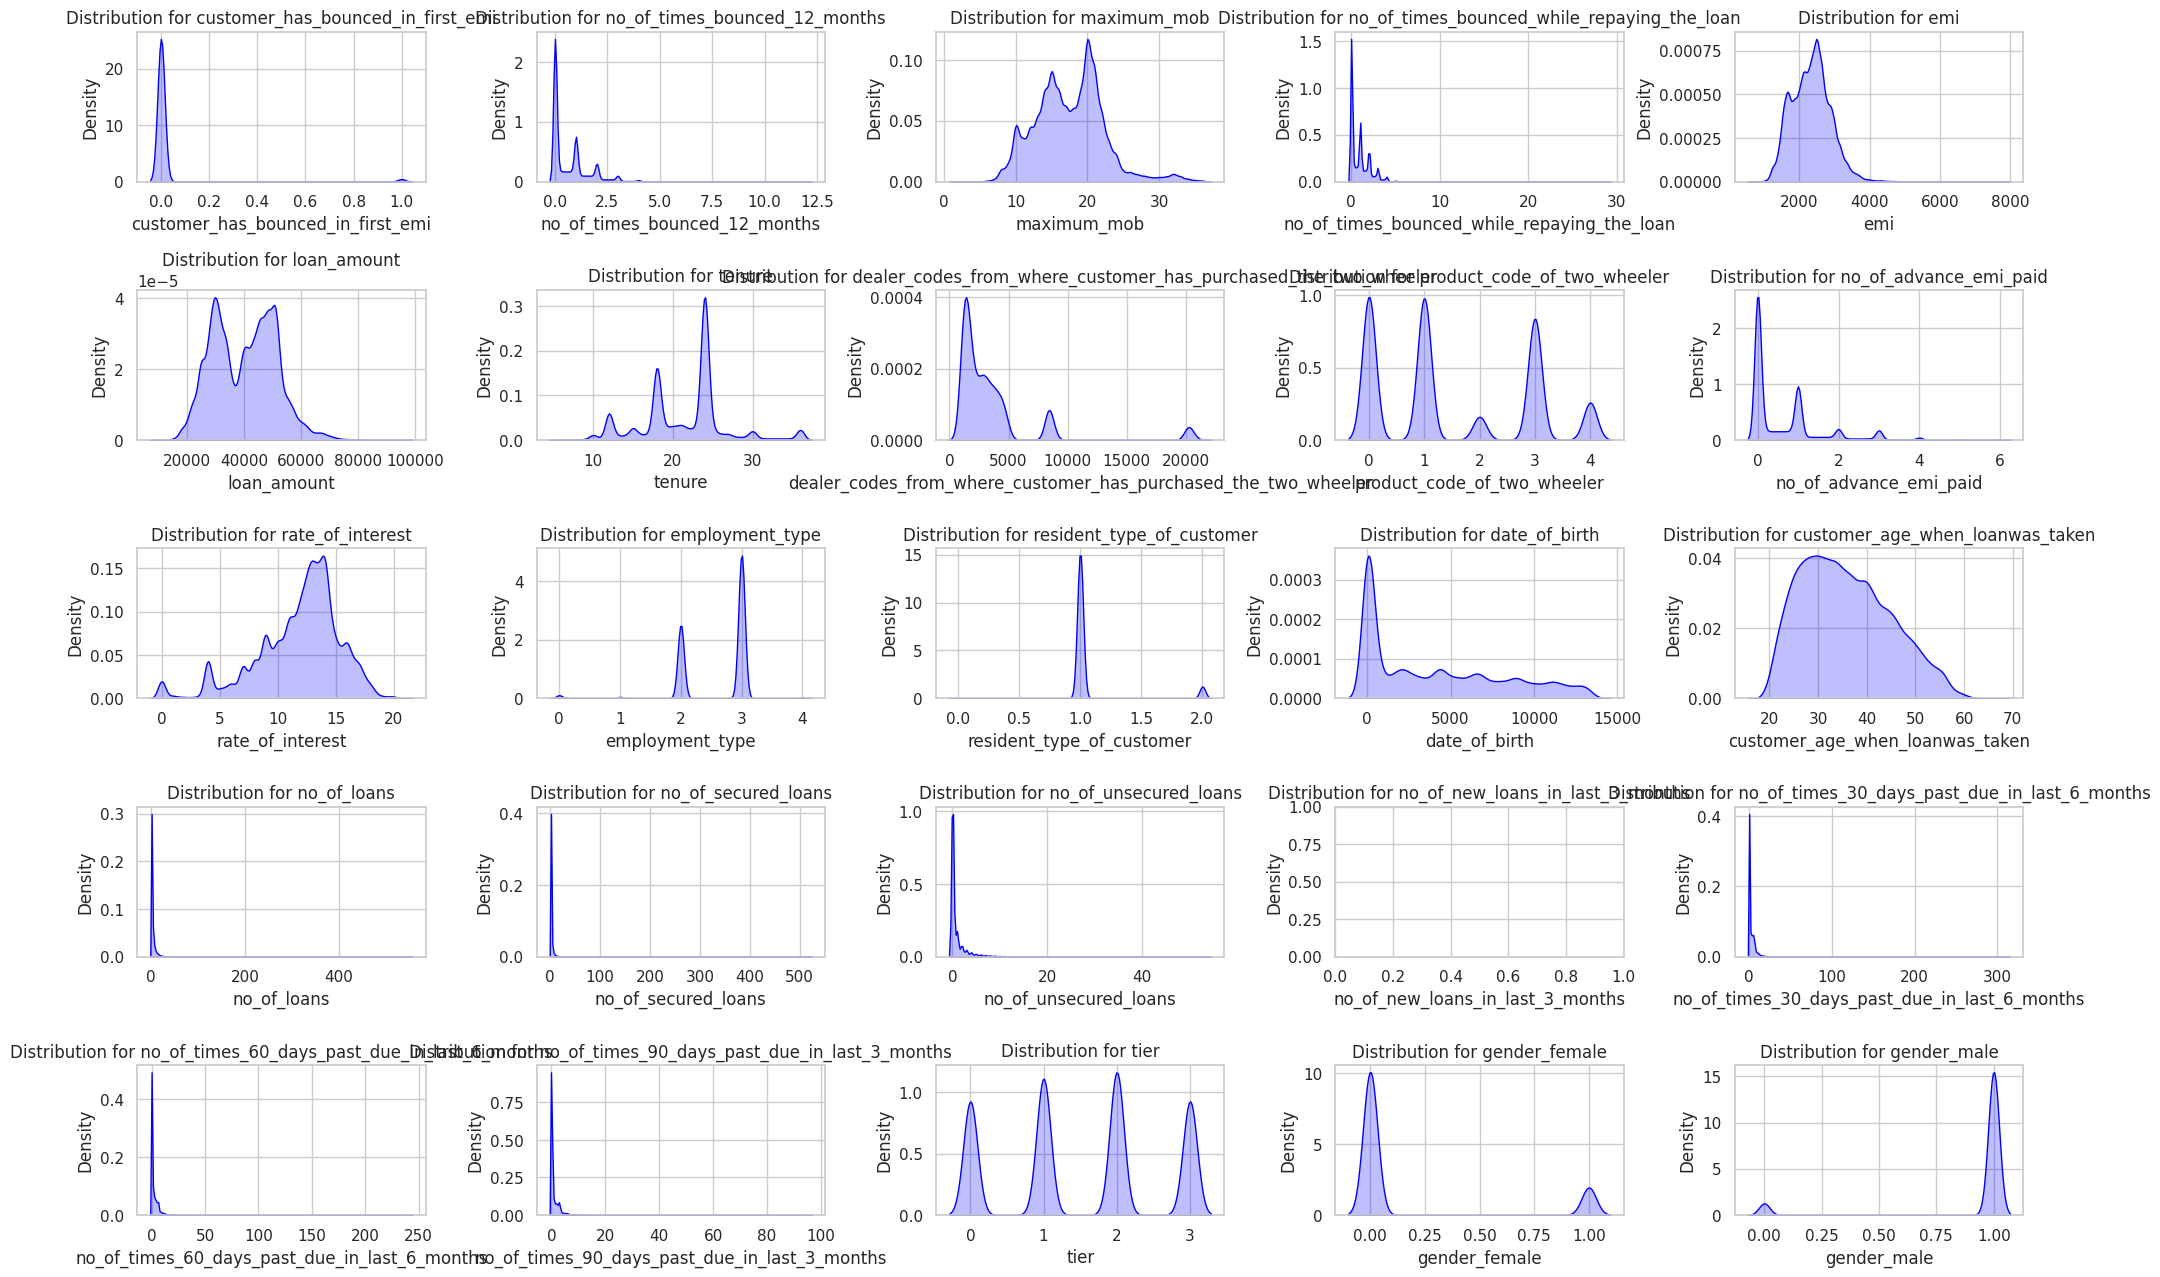

In [40]:
plt.figure(figsize=(20,15))

for i, col in enumerate(num_cols,1):
 plt.subplot(6,5,i)
 sns.kdeplot(df_final[col], fill=True, color='blue')
 plt.title(f'Distribution for {col}')

plt.tight_layout()
plt.show()

In [41]:
df_final['target_variable'].value_counts()

target_variable
0.0    83194
1.0    83194
Name: count, dtype: int64

In [42]:
# All columns except these ones
columns_to_exclude = ['customer_id','target_variable']
columns_to_scale = [col for col in df.columns if col not in columns_to_exclude]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Convert to float first
df_final[columns_to_scale] = df_final[columns_to_scale].astype(float)
# Apply scaling
df_final.loc[:,columns_to_scale] = scaler.fit_transform(df_final[columns_to_scale])

# Save the scaler in the models folder
import joblib
joblib.dump(scaler, "/home/davidkibet/Desktop/ML /models/credit_scaler.pkl")

['/home/davidkibet/Desktop/ML /models/credit_scaler.pkl']

In [43]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,166388.0,8.319401e+04,48031.789834,1.000000,41597.750000,83194.500000,124790.250000,166387.000000
customer_has_bounced_in_first_emi,166388.0,-2.408504e-17,1.000003,-0.211624,-0.211624,-0.211624,-0.211624,5.844573
no_of_times_bounced_12_months,166388.0,-2.938033e-17,1.000003,-0.718502,-0.718502,-0.619811,0.357936,12.198755
maximum_mob,166388.0,1.824313e-16,1.000003,-3.254809,-0.736466,0.003828,0.640934,3.880497
no_of_times_bounced_while_repaying_the_loan,166388.0,8.199161e-18,1.000003,-0.799257,-0.799257,-0.214334,0.540728,23.915793
emi,166388.0,7.038468e-16,1.000003,-3.013613,-0.746707,0.023012,0.626332,10.137748
loan_amount,166388.0,1.036169e-15,1.000003,-2.734063,-0.872118,0.058959,0.789029,5.115313
tenure,166388.0,-1.325531e-16,1.000003,-2.930426,-0.652618,0.444133,0.486286,2.764094
dealer_codes_from_where_customer_has_purchased_the_two_wheeler,166388.0,-1.025322e-16,1.000003,-0.666952,-0.555261,-0.293777,0.084589,4.629120
product_code_of_two_wheeler,166388.0,4.441212e-18,1.000003,-1.100882,-1.100882,-0.368302,1.096858,1.829438


In [44]:
df_final.columns

Index(['customer_id', 'customer_has_bounced_in_first_emi',
       'no_of_times_bounced_12_months', 'maximum_mob',
       'no_of_times_bounced_while_repaying_the_loan', 'emi', 'loan_amount',
       'tenure',
       'dealer_codes_from_where_customer_has_purchased_the_two_wheeler',
       'product_code_of_two_wheeler', 'no_of_advance_emi_paid',
       'rate_of_interest', 'employment_type', 'resident_type_of_customer',
       'date_of_birth', 'customer_age_when_loanwas_taken', 'no_of_loans',
       'no_of_secured_loans', 'no_of_unsecured_loans',
       'no_of_new_loans_in_last_3_months',
       'no_of_times_30_days_past_due_in_last_6_months',
       'no_of_times_60_days_past_due_in_last_6_months',
       'no_of_times_90_days_past_due_in_last_3_months', 'tier',
       'target_variable', 'gender_female', 'gender_male'],
      dtype='object')

## Training

In [45]:
X=df_final.drop(['customer_id','target_variable'],axis=1)
y=df_final[["target_variable"]]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(133110, 25)
(33278, 25)
(133110, 1)
(33278, 1)


In [48]:
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
model.fit(X_train,y_train)

/home/davidkibet/Desktop/ML /venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [50]:
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_prediction)
test_accuracy = accuracy_score(y_test, y_test_prediction)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.8223
Test Accuracy: 0.8204


In [52]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_prediction)
print("F1 Score:", f1)

F1 Score: 0.8170298726738492


In [53]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[13953  2610]
 [ 3368 13347]]


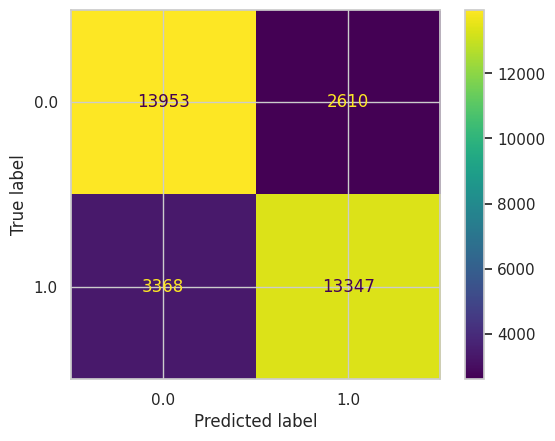

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_prediction))


              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82     16563
         1.0       0.84      0.80      0.82     16715

    accuracy                           0.82     33278
   macro avg       0.82      0.82      0.82     33278
weighted avg       0.82      0.82      0.82     33278



In [56]:
y_test_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1


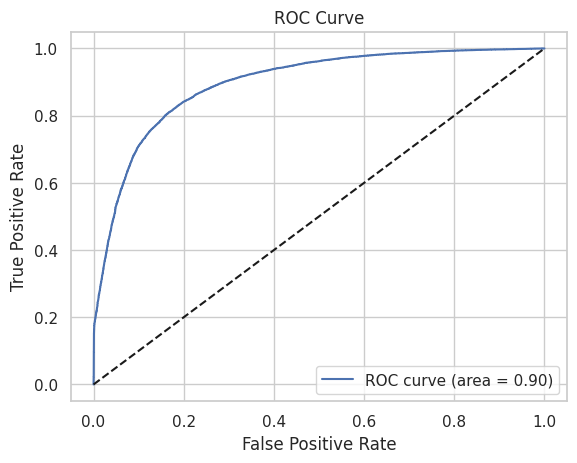

In [57]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import joblib

joblib.dump(model, 'model.pkl')

In [ ]:
loaded_model = joblib.load('model.pkl')

## Fitting a Random Forest 

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
model2 = RandomForestClassifier()

In [61]:
model2.fit(X_train, y_train)

/home/davidkibet/Desktop/ML /venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [62]:
y_pred2 = model2.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     16563
         1.0       1.00      0.98      0.99     16715

    accuracy                           0.99     33278
   macro avg       0.99      0.99      0.99     33278
weighted avg       0.99      0.99      0.99     33278



## Hyperparameter tuning

In [64]:
param_grid = {
    'n_estimators':[50,150],
    'criterion':['gini','entropy'],
    'max_depth':[5,10,None]

}

In [66]:
grid_search = GridSearchCV(model2, param_grid=param_grid, cv=3, scoring='recall')

In [67]:
grid_search.fit(X_train, y_train)

/home/davidkibet/Desktop/ML /venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/davidkibet/Desktop/ML /venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/davidkibet/Desktop/ML /venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/davidkibet/Desktop/ML /venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, None],
                         'n_estimators': [50, 150]},
             scoring='recall')

In [68]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 150}

In [70]:
best_rf = grid_search.best_estimator_

In [72]:
y_pred = best_rf.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     16563
         1.0       1.00      0.98      0.99     16715

    accuracy                           0.99     33278
   macro avg       0.99      0.99      0.99     33278
weighted avg       0.99      0.99      0.99     33278

